#                            __ID5059  Assignment 1__

__StudentID: 230028496__

__Version: 1.2__

# Loading data and preprocessing

## Load base package

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model  import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.pipeline  import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score,f1_score,confusion_matrix,accuracy_score,recall_score,precision_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import auc
import gc

D:\Anaconda\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
D:\Anaconda\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


### Set pandas display format

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows =999

## Load dataset
1. In order to ensure that there is no interaction between the model and the test set, feature screening, feature engineering, feature visualization, and model training all use the training set as source data.

2. Note: The training set will be divided into df_final_train and df__final_test later. The test set is not used directly here. It is hereby marked to avoid misunderstanding.

3. After obtaining the optimal model, finally load the test set for evaluation

### Load *Small* dataset

In [31]:
flights = pd.read_csv(r"D:\appollo\ID5059-p1\1_small\Combined_Flights_small.csv")
df = flights.drop(flights.columns[[0, 5, 6]], axis=1)

### Load *Medium* dataset

In [30]:
flights_2018 = pd.read_csv(r"D:\appollo\ID5059-p1\2_medium\Combined_Flights_med_2018.csv")
flights_2019 = pd.read_csv(r"D:\appollo\ID5059-p1\2_medium\Combined_Flights_med_2019.csv")
flights_2020 = pd.read_csv(r"D:\appollo\ID5059-p1\2_medium\Combined_Flights_med_2020.csv")
flights_2021 = pd.read_csv(r"D:\appollo\ID5059-p1\2_medium\Combined_Flights_med_2021.csv")
flights_2022 = pd.read_csv(r"D:\appollo\ID5059-p1\2_medium\Combined_Flights_med_2022.csv")
df = pd.concat([flights_2018,flights_2019,flights_2020,flights_2021,flights_2022], axis=0)

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,CRSElapsedTime,Distance,Year,Quarter,Month,DayofMonth,DayOfWeek,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,DOT_ID_Marketing_Airline,IATA_Code_Marketing_Airline,Flight_Number_Marketing_Airline,Operating_Airline,DOT_ID_Operating_Airline,IATA_Code_Operating_Airline,Tail_Number,Flight_Number_Operating_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,DestCityName,DestState,DestStateFips,DestStateName,DestWac,DepTimeBlk,CRSArrTime,ArrDel15,ArrTimeBlk,DistanceGroup,Disruption
0,2018-07-13,United Air Lines Inc.,LAX,ORD,0,0,1845,231,1744,2018,3,7,13,5,UA,UA,19977,UA,1451,UA,19977,UA,N73860,1451,12892,1289208,32575,"Los Angeles, CA",CA,6,California,91,13930,1393006,30977,"Chicago, IL",IL,17,Illinois,41,1800-1859,36,0.0,0001-0559,7,0.0
1,2018-06-26,Mesa Airlines Inc.,CRP,IAH,0,0,1757,60,201,2018,2,6,26,2,UA,UA_CODESHARE,19977,UA,6216,YV,20378,YV,N86312,6216,11140,1114008,31140,"Corpus Christi, TX",TX,48,Texas,74,12266,1226603,31453,"Houston, TX",TX,48,Texas,74,1700-1759,1857,0.0,1800-1859,1,0.0
2,2018-07-03,Southwest Airlines Co.,ECP,HOU,0,0,945,105,571,2018,3,7,3,2,WN,WN,19393,WN,1154,WN,19393,WN,N744SW,1154,11481,1148102,31481,"Panama City, FL",FL,12,Florida,33,12191,1219102,31453,"Houston, TX",TX,48,Texas,74,0900-0959,1130,0.0,1100-1159,3,0.0
3,2018-10-28,United Air Lines Inc.,LAS,IAH,0,0,1015,171,1222,2018,4,10,28,7,UA,UA,19977,UA,1720,UA,19977,UA,N37474,1720,12889,1288903,32211,"Las Vegas, NV",NV,32,Nevada,85,12266,1226603,31453,"Houston, TX",TX,48,Texas,74,1000-1059,1506,0.0,1500-1559,5,0.0
4,2018-11-01,ExpressJet Airlines Inc.,IAH,TUL,0,0,1856,90,429,2018,4,11,1,4,UA,UA_CODESHARE,19977,UA,4426,EV,20366,EV,N13975,4426,12266,1226603,31453,"Houston, TX",TX,48,Texas,74,15370,1537002,34653,"Tulsa, OK",OK,40,Oklahoma,73,1800-1859,2026,0.0,2000-2059,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40778,2022-02-28,Delta Air Lines Inc.,DCA,ATL,0,0,1705,123,547,2022,1,2,28,1,DL,DL,19790,DL,464,DL,19790,DL,N356NW,464,11278,1127805,30852,"Washington, DC",VA,51,Virginia,38,10397,1039707,30397,"Atlanta, GA",GA,13,Georgia,34,1700-1759,1908,1.0,1900-1959,3,1.0
40779,2022-05-09,United Air Lines Inc.,DFW,EWR,0,0,800,206,1372,2022,2,5,9,1,UA,UA,19977,UA,659,UA,19977,UA,N54711,659,11298,1129806,30194,"Dallas/Fort Worth, TX",TX,48,Texas,74,11618,1161802,31703,"Newark, NJ",NJ,34,New Jersey,21,0800-0859,1226,0.0,1200-1259,6,0.0
40780,2022-06-29,Delta Air Lines Inc.,ATL,CLT,0,0,1513,78,226,2022,2,6,29,3,DL,DL,19790,DL,1062,DL,19790,DL,N919AT,1062,10397,1039707,30397,"Atlanta, GA",GA,13,Georgia,34,11057,1105703,31057,"Charlotte, NC",NC,37,North Carolina,36,1500-1559,1631,1.0,1600-1659,1,1.0
40781,2022-01-02,American Airlines Inc.,TPA,ORD,0,0,1435,185,1011,2022,1,1,2,7,AA,AA,19805,AA,644,AA,19805,AA,N9013A,644,15304,1530402,33195,"Tampa, FL",FL,12,Florida,33,13930,1393007,30977,"Chicago, IL",IL,17,Illinois,41,1400-1459,1640,1.0,1600-1659,5,1.0


In [32]:
"""
    The 'small' and 'medium' dataSets do not distinguish between the training set, 
        verification set and test set, so they are divided twice to obtain the training set, 
    verification set and test set Training set:validation set:test set=6:2:2
"""
na_counts = df.isna().sum()
unique_counts = df.nunique()

summary_df = pd.DataFrame({'NA Count': na_counts, 'Unique Count': unique_counts})
# print(summary_df)
df.dropna(inplace=True)

Y = df['Disruption']
X = df.drop('Disruption',axis=1)

X_train_pri_, X_test_pri, Y_train_pri_, Y_test_pri = train_test_split(X,Y, test_size= 0.2, 
                                                            stratify=Y,random_state=1)
X_train_pri, X_val_pri, Y_train_pri, Y_val_pri = train_test_split(X_train_pri_,Y_train_pri_, 
                                                            test_size= 0.25, stratify=Y_train_pri_,
                                                            random_state=1)
df = pd.concat([X_train_pri, Y_train_pri], axis=1)
val_df = pd.concat([X_val_pri, Y_val_pri], axis=1)
test_df = pd.concat([X_test_pri, Y_test_pri], axis=1)

###  Load *Huge* dataset
**Due to memory limitations, 500M rows of data are randomly selected**

In [ ]:
flights_2018 = pd.read_csv(r"D:\appollo\ID5059-p1\4_huge\Combined_Flights_train_2018.csv")
flights_2019 = pd.read_csv(r"D:\appollo\ID5059-p1\4_huge\Combined_Flights_train_2019.csv")
flights_2020 = pd.read_csv(r"D:\appollo\ID5059-p1\4_huge\Combined_Flights_train_2020.csv")
flights_2021 = pd.read_csv(r"D:\appollo\ID5059-p1\4_huge\Combined_Flights_train_2021.csv")
flights_2022 = pd.read_csv(r"D:\appollo\ID5059-p1\4_huge\Combined_Flights_train_2022.csv")
df_huge = pd.concat([flights_2018,flights_2019,flights_2020,flights_2021,flights_2022], axis=0)
df_huge = df_huge.sample(n=5000000, random_state=1)

###  Load *Large* dataset

In [6]:
flights_2018 = pd.read_csv(r"D:\appollo\ID5059-p1\3_large\Combined_Flights_large_train_2018.csv")
flights_2019 = pd.read_csv(r"D:\appollo\ID5059-p1\3_large\Combined_Flights_large_train_2019.csv")
flights_2020 = pd.read_csv(r"D:\appollo\ID5059-p1\3_large\Combined_Flights_large_train_2020.csv")
flights_2021 = pd.read_csv(r"D:\appollo\ID5059-p1\3_large\Combined_Flights_large_train_2021.csv")
flights_2022 = pd.read_csv(r"D:\appollo\ID5059-p1\3_large\Combined_Flights_large_train_2022.csv")
df_large = pd.concat([flights_2018,flights_2019,flights_2020,flights_2021,flights_2022], axis=0)
df_large.isna().sum()
df_large.dropna(axis=0, inplace = True)

Y = df_large['Disruption']
X = df_large.drop('Disruption',axis=1)

X_train_pri, X_val_pri, Y_train_pri, Y_val_pri = train_test_split(X,Y, test_size= 0.2, 
                                                            stratify=Y,random_state=1)
df = pd.concat([X_train_pri, Y_train_pri], axis=1)
val_df = pd.concat([X_val_pri, Y_val_pri], axis=1)

cols = ['FlightDate','Airline','Origin','Dest','CRSDepTime','CRSElapsedTime',
                           'Distance','Year','Quarter','Month','DayofMonth','DayOfWeek',
                           'Marketing_Airline_Network','Operated_or_Branded_Code_Share_Partners',
                           'DOT_ID_Marketing_Airline','IATA_Code_Marketing_Airline',
                           'Flight_Number_Marketing_Airline','Operating_Airline',
                           'DOT_ID_Operating_Airline','IATA_Code_Operating_Airline',
                           'Tail_Number','Flight_Number_Operating_Airline',
                           'OriginAirportID','OriginAirportSeqID','OriginCityMarketID',
                           'OriginCityName','OriginState', 'OriginStateFips','OriginStateName',
                           'OriginWac','DestAirportID','DestAirportSeqID','DestCityMarketID',
                           'DestCityName','DestState','DestStateFips','DestStateName',
                           'DestWac','DepTimeBlk','CRSArrTime','ArrTimeBlk','DistanceGroup',
                           'Disruption']
flights_test_2018 = pd.read_csv(
    r"D:\appollo\ID5059-p1\3_large\Combined_Flights_large_test_2018.csv",
    header=None, skiprows=1)
flights_test_2019 = pd.read_csv(
    r"D:\appollo\ID5059-p1\3_large\Combined_Flights_large_test_2019.csv",
    header=None, skiprows=1)
flights_test_2020 = pd.read_csv(
    r"D:\appollo\ID5059-p1\3_large\Combined_Flights_large_test_2020.csv",
    header=None, skiprows=1)
flights_test_2021 = pd.read_csv(
    r"D:\appollo\ID5059-p1\3_large\Combined_Flights_large_test_2021.csv",
    header=None, skiprows=1)
flights_test_2022 = pd.read_csv(
    r"D:\appollo\ID5059-p1\3_large\Combined_Flights_large_test_2022.csv",
    header=None, skiprows=1)
flights_test_2018 = flights_test_2018.drop(flights_test_2018.columns[[27, 36]], axis=1)
flights_test_2019 = flights_test_2019.drop(flights_test_2019.columns[[27, 36]], axis=1)
flights_test_2020 = flights_test_2020.drop(flights_test_2020.columns[[27, 36]], axis=1)
flights_test_2021 = flights_test_2021.drop(flights_test_2021.columns[[27, 36]], axis=1)
flights_test_2022 = flights_test_2022.drop(flights_test_2022.columns[[27, 36]], axis=1)
flights_test_2018.columns = cols
flights_test_2019.columns = cols
flights_test_2020.columns = cols
flights_test_2021.columns = cols
flights_test_2022.columns = cols

test_df = pd.concat([flights_test_2018,flights_test_2019,
                           flights_test_2020,flights_test_2021,flights_test_2022], axis=0)
test_df.isna().sum()
test_df.dropna(axis=0, inplace = True)

### Data visualization display

In [33]:
print(df['Disruption'].value_counts())
print("NA values counts are:%s" % df.isna().sum().to_string())
print(df.info())
display(df)

Disruption
0    14021
1     2995
Name: count, dtype: int64


,FlightDate,Airline,Origin,Dest,CRSDepTime,CRSElapsedTime,Distance,Year,Quarter,Month,DayofMonth,DayOfWeek,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,DOT_ID_Marketing_Airline,IATA_Code_Marketing_Airline,Flight_Number_Marketing_Airline,Operating_Airline,DOT_ID_Operating_Airline,IATA_Code_Operating_Airline,Tail_Number,Flight_Number_Operating_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,DestCityName,DestState,DestStateFips,DestStateName,DestWac,DepTimeBlk,CRSArrTime,ArrDel15,ArrTimeBlk,DistanceGroup,Disruption
11056,2019-08-02,American Airlines Inc.,CLT,BDL,2248,115,644,2019,3,8,2,5,AA,AA,19805,AA,2056,AA,19805,AA,N121UW,2056,11057,1105703,31057,"Charlotte, NC",NC,37,North Carolina,36,10529,1052906,30529,"Hartford, CT",CT,9,Connecticut,11,2200-2259,43,0.0,0001-0559,3,0
5935,2019-11-07,SkyWest Airlines Inc.,DEN,FAT,1546,153,844,2019,4,11,7,4,UA,UA_CODESHARE,19977,UA,5862,OO,20304,OO,N138SY,5862,11292,1129202,30325,"Denver, CO",CO,8,Colorado,82,11638,1163807,31638,"Fresno, CA",CA,6,California,91,1500-1559,1719,0.0,1700-1759,4,0
15661,2020-01-16,Comair Inc.,TYS,PHL,1533,107,554,2020,1,1,16,4,AA,AA_CODESHARE,19805,AA,5464,OH,20397,OH,N250PS,5464,15412,1541205,35412,"Knoxville, TN",TN,47,Tennessee,54,14100,1410005,34100,"Philadelphia, PA",PA,42,Pennsylvania,23,1500-1559,1720,0.0,1700-1759,3,0
13867,2020-04-17,Delta Air Lines Inc.,MSP,SEA,1127,214,1399,2020,2,4,17,5,DL,DL,19790,DL,1670,DL,19790,DL,N811DZ,1670,13487,1348702,31650,"Minneapolis, MN",MN,27,Minnesota,63,14747,1474703,30559,"Seattle, WA",WA,53,Washington,93,1100-1159,1301,0.0,1300-1359,6,0
17160,2020-11-23,Southwest Airlines Co.,ATL,RSW,1840,100,515,2020,4,11,23,1,WN,WN,19393,WN,2333,WN,19393,WN,N291WN,2333,10397,1039707,30397,"Atlanta, GA",GA,13,Georgia,34,14635,1463502,31714,"Fort Myers, FL",FL,12,Florida,33,1800-1859,2020,0.0,2000-2059,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7244,2019-01-29,Southwest Airlines Co.,PHX,BUR,1300,95,369,2019,1,1,29,2,WN,WN,19393,WN,6667,WN,19393,WN,N701GS,6667,14107,1410702,30466,"Phoenix, AZ",AZ,4,Arizona,81,10800,1080003,32575,"Burbank, CA",CA,6,California,91,1300-1359,1335,0.0,1300-1359,2,0
22126,2021-09-29,United Air Lines Inc.,ORD,IAD,2115,116,588,2021,3,9,29,3,UA,UA,19977,UA,2676,UA,19977,UA,N39461,2676,13930,1393007,30977,"Chicago, IL",IL,17,Illinois,41,12264,1226402,30852,"Washington, DC",VA,51,Virginia,38,2100-2159,11,0.0,0001-0559,3,0
17215,2020-01-15,Republic Airlines,DCA,SRQ,833,167,851,2020,1,1,15,3,AA,AA_CODESHARE,19805,AA,4469,YX,20452,YX,N111HQ,4469,11278,1127805,30852,"Washington, DC",VA,51,Virginia,38,14986,1498603,34986,"Sarasota/Bradenton, FL",FL,12,Florida,33,0800-0859,1120,0.0,1100-1159,4,0
6234,2019-04-23,Envoy Air,SJT,DFW,1439,65,229,2019,2,4,23,2,AA,AA_CODESHARE,19805,AA,3843,MQ,20398,MQ,N808AE,3843,14842,1484202,34842,"San Angelo, TX",TX,48,Texas,74,11298,1129806,30194,"Dallas/Fort Worth, TX",TX,48,Texas,74,1400-1459,1544,0.0,1500-1559,1,0


<class 'pandas.core.frame.DataFrame'>
Index: 17016 entries, 11056 to 9797
Data columns (total 44 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   FlightDate                               17016 non-null  object 
 1   Airline                                  17016 non-null  object 
 2   Origin                                   17016 non-null  object 
 3   Dest                                     17016 non-null  object 
 4   CRSDepTime                               17016 non-null  int64  
 5   CRSElapsedTime                           17016 non-null  int64  
 6   Distance                                 17016 non-null  int64  
 7   Year                                     17016 non-null  int64  
 8   Quarter                                  17016 non-null  int64  
 9   Month                                    17016 non-null  int64  
 10  DayofMonth                               17016 n

## Data preprocessing
**Remove some feature variables as required**

In [34]:
def drop_Columns(df):
    dropCols = ['Cancelled', 'Diverted', 'ArrDel15', 'DepTime', 'DepDelayMinutes',
                       'DepDelay', 'ArrTime', 'ArrDelayMinutes', 'AirTime', 'ActualElapsedTime',
                       'DepDel15', 'DepartureDelayGroups', 'TaxiOut', 'WheelsOff', 'WheelsOn',
                       'TaxiIn', 'ArrDelay', 'ArrivalDelayGroups', 'DivAirportLandings'
               ]
    cols = df.columns.tolist()
    for name in dropCols:
        if name in cols:
            df.drop(name, axis=1, inplace=True)
    return df

df = drop_Columns(df)
display(df)

,FlightDate,Airline,Origin,Dest,CRSDepTime,CRSElapsedTime,Distance,Year,Quarter,Month,DayofMonth,DayOfWeek,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,DOT_ID_Marketing_Airline,IATA_Code_Marketing_Airline,Flight_Number_Marketing_Airline,Operating_Airline,DOT_ID_Operating_Airline,IATA_Code_Operating_Airline,Tail_Number,Flight_Number_Operating_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,DestCityName,DestState,DestStateFips,DestStateName,DestWac,DepTimeBlk,CRSArrTime,ArrTimeBlk,DistanceGroup,Disruption
11056,2019-08-02,American Airlines Inc.,CLT,BDL,2248,115,644,2019,3,8,2,5,AA,AA,19805,AA,2056,AA,19805,AA,N121UW,2056,11057,1105703,31057,"Charlotte, NC",NC,37,North Carolina,36,10529,1052906,30529,"Hartford, CT",CT,9,Connecticut,11,2200-2259,43,0001-0559,3,0
5935,2019-11-07,SkyWest Airlines Inc.,DEN,FAT,1546,153,844,2019,4,11,7,4,UA,UA_CODESHARE,19977,UA,5862,OO,20304,OO,N138SY,5862,11292,1129202,30325,"Denver, CO",CO,8,Colorado,82,11638,1163807,31638,"Fresno, CA",CA,6,California,91,1500-1559,1719,1700-1759,4,0
15661,2020-01-16,Comair Inc.,TYS,PHL,1533,107,554,2020,1,1,16,4,AA,AA_CODESHARE,19805,AA,5464,OH,20397,OH,N250PS,5464,15412,1541205,35412,"Knoxville, TN",TN,47,Tennessee,54,14100,1410005,34100,"Philadelphia, PA",PA,42,Pennsylvania,23,1500-1559,1720,1700-1759,3,0
13867,2020-04-17,Delta Air Lines Inc.,MSP,SEA,1127,214,1399,2020,2,4,17,5,DL,DL,19790,DL,1670,DL,19790,DL,N811DZ,1670,13487,1348702,31650,"Minneapolis, MN",MN,27,Minnesota,63,14747,1474703,30559,"Seattle, WA",WA,53,Washington,93,1100-1159,1301,1300-1359,6,0
17160,2020-11-23,Southwest Airlines Co.,ATL,RSW,1840,100,515,2020,4,11,23,1,WN,WN,19393,WN,2333,WN,19393,WN,N291WN,2333,10397,1039707,30397,"Atlanta, GA",GA,13,Georgia,34,14635,1463502,31714,"Fort Myers, FL",FL,12,Florida,33,1800-1859,2020,2000-2059,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7244,2019-01-29,Southwest Airlines Co.,PHX,BUR,1300,95,369,2019,1,1,29,2,WN,WN,19393,WN,6667,WN,19393,WN,N701GS,6667,14107,1410702,30466,"Phoenix, AZ",AZ,4,Arizona,81,10800,1080003,32575,"Burbank, CA",CA,6,California,91,1300-1359,1335,1300-1359,2,0
22126,2021-09-29,United Air Lines Inc.,ORD,IAD,2115,116,588,2021,3,9,29,3,UA,UA,19977,UA,2676,UA,19977,UA,N39461,2676,13930,1393007,30977,"Chicago, IL",IL,17,Illinois,41,12264,1226402,30852,"Washington, DC",VA,51,Virginia,38,2100-2159,11,0001-0559,3,0
17215,2020-01-15,Republic Airlines,DCA,SRQ,833,167,851,2020,1,1,15,3,AA,AA_CODESHARE,19805,AA,4469,YX,20452,YX,N111HQ,4469,11278,1127805,30852,"Washington, DC",VA,51,Virginia,38,14986,1498603,34986,"Sarasota/Bradenton, FL",FL,12,Florida,33,0800-0859,1120,1100-1159,4,0
6234,2019-04-23,Envoy Air,SJT,DFW,1439,65,229,2019,2,4,23,2,AA,AA_CODESHARE,19805,AA,3843,MQ,20398,MQ,N808AE,3843,14842,1484202,34842,"San Angelo, TX",TX,48,Texas,74,11298,1129806,30194,"Dallas/Fort Worth, TX",TX,48,Texas,74,1400-1459,1544,1500-1559,1,0


### Feature engineering creates new feature variables
1. *Month_Sin*: Convert the month into a continuous variable according to the sin function

2. *Month_Cos*: Convert the month into a continuous variable according to the cos function

3. *DayOfWeek_Sin*: Convert the day of the flight into a continuous variable according to the sin function

4. *DayOfWeek_Sin*: Convert the day of the flight into a continuous variable according to the cos function

5. *year_mean_distance*: Calculate the average flight distance per year

6. *quarter_mean_distance*: Calculate the average flight distance per quarter

7. *day_mean_distance*: Calculate the average flight distance per day per month

In [35]:
import numpy as np
def create_NewFeatures(df):
    df['DayOfWeek'] = df['DayOfWeek'].astype(int)
    df['DayofMonth'] = df['DayofMonth'].astype(int)
    
    df['Month_Sin'] = np.sin(2 * np.pi * df['Month'] / 12)
    df['Month_Cos'] = np.cos(2 * np.pi * df['Month'] / 12)
    df['DayOfWeek_Sin'] = np.sin(2 * np.pi * df['DayOfWeek'].astype(int) / 7)
    df['DayOfWeek_Cos'] = np.cos(2 * np.pi * df['DayOfWeek'].astype(int) / 7)
    
    year_mean_distance = df.groupby('Year')['Distance'].mean()
    quarter_mean_distance = df.groupby('Quarter')['Distance'].mean()
    day_mean_distance = df.groupby('DayofMonth')['Distance'].mean()
    df = df.merge(year_mean_distance, on='Year', suffixes=('', '_YearMean'))
    df = df.merge(quarter_mean_distance, on='Quarter', suffixes=('', '_QuarterMean'))
    df = df.merge(day_mean_distance, on='DayofMonth', suffixes=('', '_DayMean'))
    return df

df = create_NewFeatures(df)

### Count the number of *NA* values ​​appearing in each column and filter out the corresponding rows

In [36]:
def drop_NARows(df):
    df.isna().sum()
    df.dropna(axis=0, inplace = True)
    cols = df.columns.tolist()
    for name in cols:
        if name in ['DayofMonth', 'DayOfWeek','FlightDate']:
            df.drop(name, axis=1, inplace=True)
    return df

df = drop_NARows(df)
df.columns

Index(['Airline', 'Origin', 'Dest', 'CRSDepTime', 'CRSElapsedTime', 'Distance',
       'Year', 'Quarter', 'Month', 'Marketing_Airline_Network',
       'Operated_or_Branded_Code_Share_Partners', 'DOT_ID_Marketing_Airline',
       'IATA_Code_Marketing_Airline', 'Flight_Number_Marketing_Airline',
       'Operating_Airline', 'DOT_ID_Operating_Airline',
       'IATA_Code_Operating_Airline', 'Tail_Number',
       'Flight_Number_Operating_Airline', 'OriginAirportID',
       'OriginAirportSeqID', 'OriginCityMarketID', 'OriginCityName',
       'OriginState', 'OriginStateFips', 'OriginStateName', 'OriginWac',
       'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID', 'DestCityName',
       'DestState', 'DestStateFips', 'DestStateName', 'DestWac', 'DepTimeBlk',
       'CRSArrTime', 'ArrTimeBlk', 'DistanceGroup', 'Disruption', 'Month_Sin',
       'Month_Cos', 'DayOfWeek_Sin', 'DayOfWeek_Cos', 'Distance_YearMean',
       'Distance_QuarterMean', 'Distance_DayMean'],
      dtype='object')

# Visualise air disruption Impacts of Covid

## Trends of total quarter disruption ratio('0' vs '1')

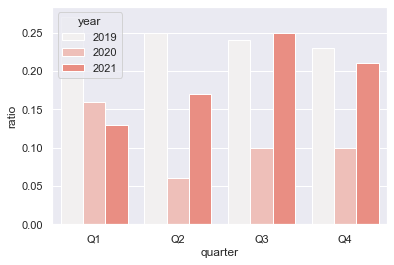

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
def Quarter_Ratio(df, year, quarter):
    a = len(df[(df['Year']==year)&(df['Quarter']==quarter)&(df['Disruption']==1)])
    b = len(df[(df['Year']==year)&(df['Quarter']==quarter)&(df['Disruption']==0)])
    ratio = round(a/b, 2)
    return ratio

def quarter_Disruption_Ratio(df):
    df_Quarter_Ratio = pd.DataFrame(
        data=[  ['2019', 'Q1', Quarter_Ratio(df, 2019, 1)], ['2019', 'Q2', Quarter_Ratio(df, 2019, 2)], 
                ['2019', 'Q3', Quarter_Ratio(df, 2019, 3)], ['2019', 'Q4', Quarter_Ratio(df, 2019, 4)],
                ['2020', 'Q1', Quarter_Ratio(df, 2020, 1)], ['2020', 'Q2', Quarter_Ratio(df, 2020, 2)], 
                ['2020', 'Q3', Quarter_Ratio(df, 2020, 3)], ['2020', 'Q4', Quarter_Ratio(df, 2020, 4)],
                ['2021', 'Q1', Quarter_Ratio(df, 2021, 1)], ['2021', 'Q2', Quarter_Ratio(df, 2021, 2)], 
                ['2021', 'Q3', Quarter_Ratio(df, 2021, 3)], ['2021', 'Q4', Quarter_Ratio(df, 2021, 4)],
            ], columns=['year','quarter','ratio'])

    plt.rcParams['font.sans-serif'] = 'Microsoft YaHei'
    sns.set(style='darkgrid')
    sns.barplot(x=df_Quarter_Ratio['quarter'], y=df_Quarter_Ratio['ratio'],
               hue=df_Quarter_Ratio['year'], color='salmon')
    plt.show()

quarter_Disruption_Ratio(df)

## Trends of disruption records('1') of five most busy cities

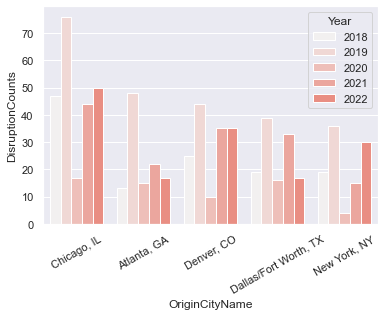

In [38]:
def Cities_Records(df):
    temp_records = df.groupby(['OriginCityName'])['Disruption'].value_counts().unstack()
    sum_records = temp_records[0.0]+temp_records[1.0]
    sum_records = sum_records.sort_values(ascending=False)
    records = pd.DataFrame(
            data=[['Chicago, IL', '2018', df[(df['OriginCityName']=='Chicago, IL')&
                                            (df['Year']==2018)]['Disruption'].value_counts()[1.0]],
                  ['Chicago, IL', '2019', df[(df['OriginCityName']=='Chicago, IL')&
                                            (df['Year']==2019)]['Disruption'].value_counts()[1.0]],
                  ['Chicago, IL', '2020', df[(df['OriginCityName']=='Chicago, IL')&
                                            (df['Year']==2020)]['Disruption'].value_counts()[1.0]],
                  ['Chicago, IL', '2021', df[(df['OriginCityName']=='Chicago, IL')&
                                            (df['Year']==2021)]['Disruption'].value_counts()[1.0]],
                  ['Chicago, IL', '2022', df[(df['OriginCityName']=='Chicago, IL')&
                                            (df['Year']==2022)]['Disruption'].value_counts()[1.0]],
                  ['Atlanta, GA', '2018', df[(df['OriginCityName']=='Atlanta, GA')&
                                            (df['Year']==2018)]['Disruption'].value_counts()[1.0]],
                  ['Atlanta, GA', '2019', df[(df['OriginCityName']=='Atlanta, GA')&
                                            (df['Year']==2019)]['Disruption'].value_counts()[1.0]],
                  ['Atlanta, GA', '2020', df[(df['OriginCityName']=='Atlanta, GA')&
                                            (df['Year']==2020)]['Disruption'].value_counts()[1.0]],
                  ['Atlanta, GA', '2021', df[(df['OriginCityName']=='Atlanta, GA')&
                                            (df['Year']==2021)]['Disruption'].value_counts()[1.0]],
                  ['Atlanta, GA', '2022', df[(df['OriginCityName']=='Atlanta, GA')&
                                            (df['Year']==2022)]['Disruption'].value_counts()[1.0]],
                  ['Denver, CO', '2018', df[(df['OriginCityName']=='Denver, CO')&
                                            (df['Year']==2018)]['Disruption'].value_counts()[1.0]],
                  ['Denver, CO', '2019', df[(df['OriginCityName']=='Denver, CO')&
                                            (df['Year']==2019)]['Disruption'].value_counts()[1.0]],
                  ['Denver, CO', '2020', df[(df['OriginCityName']=='Denver, CO')&
                                            (df['Year']==2020)]['Disruption'].value_counts()[1.0]],
                  ['Denver, CO', '2021', df[(df['OriginCityName']=='Denver, CO')&
                                            (df['Year']==2021)]['Disruption'].value_counts()[1.0]],
                  ['Denver, CO', '2022', df[(df['OriginCityName']=='Denver, CO')&
                                            (df['Year']==2022)]['Disruption'].value_counts()[1.0]],
                  ['Dallas/Fort Worth, TX', '2018', df[(df['OriginCityName']=='Dallas/Fort Worth, TX')&
                                            (df['Year']==2018)]['Disruption'].value_counts()[1.0]],
                  ['Dallas/Fort Worth, TX', '2019', df[(df['OriginCityName']=='Dallas/Fort Worth, TX')&
                                            (df['Year']==2019)]['Disruption'].value_counts()[1.0]],
                  ['Dallas/Fort Worth, TX', '2020', df[(df['OriginCityName']=='Dallas/Fort Worth, TX')&
                                            (df['Year']==2020)]['Disruption'].value_counts()[1.0]],
                  ['Dallas/Fort Worth, TX', '2021', df[(df['OriginCityName']=='Dallas/Fort Worth, TX')&
                                            (df['Year']==2021)]['Disruption'].value_counts()[1.0]],
                  ['Dallas/Fort Worth, TX', '2022', df[(df['OriginCityName']=='Dallas/Fort Worth, TX')&
                                            (df['Year']==2022)]['Disruption'].value_counts()[1.0]],
                  ['New York, NY', '2018', df[(df['OriginCityName']=='New York, NY')&
                                            (df['Year']==2018)]['Disruption'].value_counts()[1.0]],
                  ['New York, NY', '2019', df[(df['OriginCityName']=='New York, NY')&
                                            (df['Year']==2019)]['Disruption'].value_counts()[1.0]],
                  ['New York, NY', '2020', df[(df['OriginCityName']=='New York, NY')&
                                            (df['Year']==2020)]['Disruption'].value_counts()[1.0]],
                  ['New York, NY', '2021', df[(df['OriginCityName']=='New York, NY')&
                                            (df['Year']==2021)]['Disruption'].value_counts()[1.0]],
                  ['New York, NY', '2022', df[(df['OriginCityName']=='New York, NY')&
                                            (df['Year']==2022)]['Disruption'].value_counts()[1.0]],
                 ], columns=['OriginCityName', 'Year', 'DisruptionCounts'])
#     display(records)
    plt.rcParams['font.sans-serif'] = 'Microsoft YaHei'
    sns.set(style='darkgrid')
    ax = sns.barplot(x=records['OriginCityName'], y=records['DisruptionCounts'],
           hue=records['Year'], color='salmon')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
    plt.show()
    
Cities_Records(df)

# Pre Feature Selection Process

## split train,test datasets based on __Train dataset__

In [39]:
X_train = df.copy()
y = df['Disruption'].values

In [40]:
X_train.drop('Disruption',axis=1, inplace = True)
X = X_train.values
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size= 0.3, stratify=y, random_state=1)

In [42]:
idx = np.random.choice(np.arange(len(X_test)), 2000, replace=False)
X_test = X_test[idx]
y_test = y_test[idx]

## balance Positive and Negative samples
The *medium* data set is selected, so 150,000 rows are randomly selected.

When the *large* data set is selected, 1.5 million rows are randomly selected.

In [43]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=1)
X_rus, y_rus = ros.fit_resample(X_train, y_train)
idx = np.random.choice(np.arange(len(X_rus)), 15000, replace=False)
X_rus = X_rus[idx]
y_rus = y_rus[idx]
np.bincount(y_rus.astype(int))

array([7460, 7540], dtype=int64)

In [44]:
dfTrain = pd.DataFrame(X_rus)
dfTest = pd.DataFrame(X_test)

In [45]:
print(display(dfTrain))
print(display(dfTest))
print(display(df))
print(df.info())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45
0,Frontier Airlines Inc.,MCO,CMH,1606,137,802,2018,2,4,F9,F9,20436,F9,1696,F9,20436,F9,N205FR,1696,13204,1320402,31454,"Orlando, FL",FL,12,Florida,33,11066,1106606,31066,"Columbus, OH",OH,39,Ohio,44,1600-1659,1823,1800-1859,4,0.866025,-0.5,0.433884,-0.900969,778.332637,770.09381,754.597353
1,Delta Air Lines Inc.,SAN,MSP,1355,222,1532,2018,4,10,DL,DL,19790,DL,1728,DL,19790,DL,N3768,1728,14679,1467903,33570,"San Diego, CA",CA,6,California,91,13487,1348702,31650,"Minneapolis, MN",MN,27,Minnesota,63,1300-1359,1937,1900-1959,7,-0.866025,0.5,-0.0,1.0,778.332637,775.278858,783.053957
2,Delta Air Lines Inc.,GSO,ATL,1854,85,306,2018,4,10,DL,DL,19790,DL,517,DL,19790,DL,N951DL,517,11995,1199502,31995,"Greensboro/High Point, NC",NC,37,North Carolina,36,10397,1039707,30397,"Atlanta, GA",GA,13,Georgia,34,1800-1859,2019,2000-2059,2,-0.866025,0.5,-0.974928,-0.222521,778.332637,775.278858,799.752874
3,United Air Lines Inc.,EWR,SEA,1800,387,2402,2020,1,2,UA,UA,19977,UA,2151,UA,19977,UA,N17126,2151,11618,1161802,31703,"Newark, NJ",NJ,34,New Jersey,21,14747,1474703,30559,"Seattle, WA",WA,53,Washington,93,1800-1859,2127,2100-2159,10,0.866025,0.5,-0.433884,-0.900969,746.632617,784.524676,775.5
4,Republic Airlines,EYW,MIA,1918,45,126,2019,2,4,AA,AA_CODESHARE,19805,AA,4481,YX,20452,YX,N424YX,4481,11624,1162403,31624,"Key West, FL",FL,12,Florida,33,13303,1330303,32467,"Miami, FL",FL,12,Florida,33,1900-1959,2003,2000-2059,1,0.866025,-0.5,0.974928,-0.222521,781.225739,770.09381,778.00367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,Endeavor Air Inc.,DTW,GSP,1357,106,508,2018,2,4,DL,DL_CODESHARE,19790,DL,3330,9E,20363,9E,N311PQ,3330,11433,1143302,31295,"Detroit, MI",MI,26,Michigan,43,11996,1199603,31871,"Greer, SC",SC,45,South Carolina,37,1300-1359,1543,1500-1559,3,0.866025,-0.5,0.433884,-0.900969,778.332637,770.09381,782.824859
14996,United Air Lines Inc.,DEN,IAD,615,192,1452,2019,3,9,UA,UA,19977,UA,1949,UA,19977,UA,N12238,1949,11292,1129202,30325,"Denver, CO",CO,8,Colorado,82,12264,1226402,30852,"Washington, DC",VA,51,Virginia,38,0600-0659,1127,1100-1159,6,-1.0,-0.0,-0.433884,-0.900969,781.225739,785.923701,799.752874
14997,Endeavor Air Inc.,ATL,AGS,1547,65,143,2019,3,8,DL,DL_CODESHARE,19790,DL,3398,9E,20363,9E,N8976E,3398,10397,1039707,30397,"Atlanta, GA",GA,13,Georgia,34,10208,1020803,30208,"Augusta, GA",GA,13,Georgia,34,1500-1559,1652,1600-1659,1,-0.866025,-0.5,-0.781831,0.62349,781.225739,785.923701,817.427221
14998,Southwest Airlines Co.,MDW,DAL,1345,135,793,2021,2,6,WN,WN,19393,WN,4094,WN,19393,WN,N7742B,4094,13232,1323202,30977,"Chicago, IL",IL,17,Illinois,41,11259,1125904,30194,"Dallas, TX",TX,48,Texas,74,1300-1359,1600,1600-1659,4,0.0,-1.0,0.433884,-0.900969,784.73207,770.09381,694.317774


None


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45
0,Delta Air Lines Inc.,FLL,LGA,1435,180,1076,2021,4,12,DL,DL,19790,DL,2870,DL,19790,DL,N3734B,2870,11697,1169706,32467,"Fort Lauderdale, FL",FL,12,Florida,33,12953,1295304,31703,"New York, NY",NY,36,New York,22,1400-1459,1735,1700-1759,5,-0.0,1.0,0.781831,0.62349,784.73207,775.278858,775.5
1,JetBlue Airways,MCO,EWR,1037,162,937,2019,4,12,B6,B6,20409,B6,28,B6,20409,B6,N807JB,28,13204,1320402,31454,"Orlando, FL",FL,12,Florida,33,11618,1161802,31703,"Newark, NJ",NJ,34,New Jersey,21,1000-1059,1319,1300-1359,4,-0.0,1.0,0.433884,-0.900969,781.225739,775.278858,772.883424
2,Southwest Airlines Co.,TPA,MDW,700,155,997,2019,4,10,WN,WN,19393,WN,4600,WN,19393,WN,N260WN,4600,15304,1530402,33195,"Tampa, FL",FL,12,Florida,33,13232,1323202,30977,"Chicago, IL",IL,17,Illinois,41,0700-0759,835,0800-0859,4,-0.866025,0.5,-0.781831,0.62349,781.225739,775.278858,749.583916
3,SkyWest Airlines Inc.,SLC,OMA,935,135,840,2020,4,11,DL,DL_CODESHARE,19790,DL,3784,OO,20304,OO,N303SY,3784,14869,1486903,34614,"Salt Lake City, UT",UT,49,Utah,87,13871,1387102,33316,"Omaha, NE",NE,31,Nebraska,65,0900-0959,1250,1200-1259,4,-0.5,0.866025,0.433884,-0.900969,746.632617,775.278858,782.824859
4,Endeavor Air Inc.,LGA,RIC,1000,101,292,2022,2,4,DL,DL_CODESHARE,19790,DL,5217,9E,20363,9E,N348PQ,5217,12953,1295304,31703,"New York, NY",NY,36,New York,22,14524,1452401,34524,"Richmond, VA",VA,51,Virginia,38,1000-1059,1141,1100-1159,2,0.866025,-0.5,0.974928,-0.222521,806.107113,770.09381,794.62892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,JetBlue Airways,BOS,JAX,2113,168,1010,2019,2,5,B6,B6,20409,B6,2009,B6,20409,B6,N203JB,2009,10721,1072102,30721,"Boston, MA",MA,25,Massachusetts,13,12451,1245102,31136,"Jacksonville, FL",FL,12,Florida,33,2100-2159,1,0001-0559,5,0.5,-0.866025,-0.974928,-0.222521,781.225739,770.09381,776.539634
1996,JetBlue Airways,MCO,JFK,1900,152,944,2022,1,1,B6,B6,20409,B6,384,B6,20409,B6,N283JB,384,13204,1320402,31454,"Orlando, FL",FL,12,Florida,33,12478,1247805,31703,"New York, NY",NY,36,New York,22,1900-1959,2132,2100-2159,4,0.5,0.866025,-0.781831,0.62349,806.107113,784.524676,807.442907
1997,Air Wisconsin Airlines Corp,RIC,ORD,1840,132,642,2018,3,9,UA,UA_CODESHARE,19977,UA,3801,ZW,20046,ZW,N431AW,3801,14524,1452401,34524,"Richmond, VA",VA,51,Virginia,38,13930,1393006,30977,"Chicago, IL",IL,17,Illinois,41,1800-1859,1952,1900-1959,3,-1.0,-0.0,-0.974928,-0.222521,778.332637,785.923701,822.151667
1998,Hawaiian Airlines Inc.,PDX,HNL,810,360,2603,2019,3,7,HA,HA,19690,HA,25,HA,19690,HA,N217HA,25,14057,1405702,34057,"Portland, OR",OR,41,Oregon,92,12173,1217305,32134,"Honolulu, HI",HI,15,Hawaii,2,0800-0859,1110,1100-1159,11,-0.5,-0.866025,0.974928,-0.222521,781.225739,785.923701,832.403255


None


,Airline,Origin,Dest,CRSDepTime,CRSElapsedTime,Distance,Year,Quarter,Month,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,DOT_ID_Marketing_Airline,IATA_Code_Marketing_Airline,Flight_Number_Marketing_Airline,Operating_Airline,DOT_ID_Operating_Airline,IATA_Code_Operating_Airline,Tail_Number,Flight_Number_Operating_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,DestCityName,DestState,DestStateFips,DestStateName,DestWac,DepTimeBlk,CRSArrTime,ArrTimeBlk,DistanceGroup,Disruption,Month_Sin,Month_Cos,DayOfWeek_Sin,DayOfWeek_Cos,Distance_YearMean,Distance_QuarterMean,Distance_DayMean
0,American Airlines Inc.,CLT,BDL,2248,115,644,2019,3,8,AA,AA,19805,AA,2056,AA,19805,AA,N121UW,2056,11057,1105703,31057,"Charlotte, NC",NC,37,North Carolina,36,10529,1052906,30529,"Hartford, CT",CT,9,Connecticut,11,2200-2259,43,0001-0559,3,0,-0.866025,-5.000000e-01,-9.749279e-01,-0.222521,781.225739,785.923701,752.944341
1,SkyWest Airlines Inc.,DEN,FAT,1546,153,844,2019,4,11,UA,UA_CODESHARE,19977,UA,5862,OO,20304,OO,N138SY,5862,11292,1129202,30325,"Denver, CO",CO,8,Colorado,82,11638,1163807,31638,"Fresno, CA",CA,6,California,91,1500-1559,1719,1700-1759,4,0,-0.500000,8.660254e-01,-4.338837e-01,-0.900969,781.225739,775.278858,755.721440
2,Comair Inc.,TYS,PHL,1533,107,554,2020,1,1,AA,AA_CODESHARE,19805,AA,5464,OH,20397,OH,N250PS,5464,15412,1541205,35412,"Knoxville, TN",TN,47,Tennessee,54,14100,1410005,34100,"Philadelphia, PA",PA,42,Pennsylvania,23,1500-1559,1720,1700-1759,3,0,0.500000,8.660254e-01,-4.338837e-01,-0.900969,746.632617,784.524676,778.003670
3,Delta Air Lines Inc.,MSP,SEA,1127,214,1399,2020,2,4,DL,DL,19790,DL,1670,DL,19790,DL,N811DZ,1670,13487,1348702,31650,"Minneapolis, MN",MN,27,Minnesota,63,14747,1474703,30559,"Seattle, WA",WA,53,Washington,93,1100-1159,1301,1300-1359,6,0,0.866025,-5.000000e-01,-9.749279e-01,-0.222521,746.632617,770.093810,729.176364
4,Southwest Airlines Co.,ATL,RSW,1840,100,515,2020,4,11,WN,WN,19393,WN,2333,WN,19393,WN,N291WN,2333,10397,1039707,30397,"Atlanta, GA",GA,13,Georgia,34,14635,1463502,31714,"Fort Myers, FL",FL,12,Florida,33,1800-1859,2020,2000-2059,3,0,-0.500000,8.660254e-01,7.818315e-01,0.623490,746.632617,775.278858,836.454545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17011,Southwest Airlines Co.,PHX,BUR,1300,95,369,2019,1,1,WN,WN,19393,WN,6667,WN,19393,WN,N701GS,6667,14107,1410702,30466,"Phoenix, AZ",AZ,4,Arizona,81,10800,1080003,32575,"Burbank, CA",CA,6,California,91,1300-1359,1335,1300-1359,2,0,0.500000,8.660254e-01,9.749279e-01,-0.222521,781.225739,784.524676,757.150190
17012,United Air Lines Inc.,ORD,IAD,2115,116,588,2021,3,9,UA,UA,19977,UA,2676,UA,19977,UA,N39461,2676,13930,1393007,30977,"Chicago, IL",IL,17,Illinois,41,12264,1226402,30852,"Washington, DC",VA,51,Virginia,38,2100-2159,11,0001-0559,3,0,-1.000000,-1.836970e-16,4.338837e-01,-0.900969,784.732070,785.923701,757.150190
17013,Republic Airlines,DCA,SRQ,833,167,851,2020,1,1,AA,AA_CODESHARE,19805,AA,4469,YX,20452,YX,N111HQ,4469,11278,1127805,30852,"Washington, DC",VA,51,Virginia,38,14986,1498603,34986,"Sarasota/Bradenton, FL",FL,12,Florida,33,0800-0859,1120,1100-1159,4,0,0.500000,8.660254e-01,4.338837e-01,-0.900969,746.632617,784.524676,807.442907
17014,Envoy Air,SJT,DFW,1439,65,229,2019,2,4,AA,AA_CODESHARE,19805,AA,3843,MQ,20398,MQ,N808AE,3843,14842,1484202,34842,"San Angelo, TX",TX,48,Texas,74,11298,1129806,30194,"Dallas/Fort Worth, TX",TX,48,Texas,74,1400-1459,1544,1500-1559,1,0,0.866025,-5.000000e-01,9.749279e-01,-0.222521,781.225739,770.093810,836.454545


None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17016 entries, 0 to 17015
Data columns (total 47 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Airline                                  17016 non-null  object 
 1   Origin                                   17016 non-null  object 
 2   Dest                                     17016 non-null  object 
 3   CRSDepTime                               17016 non-null  int64  
 4   CRSElapsedTime                           17016 non-null  int64  
 5   Distance                                 17016 non-null  int64  
 6   Year                                     17016 non-null  int64  
 7   Quarter                                  17016 non-null  int64  
 8   Month                                    17016 non-null  int64  
 9   Marketing_Airline_Network                17016 non-null  object 
 10  Operated_or_Branded_Code_Share_Partners  

## Apply Ordinal Encoder
Apply OrdinalEncoder to _object_ type covariates

In [46]:
from sklearn.preprocessing import OrdinalEncoder

def Ordinal_Encoder(df):
    ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
    for i in range(df.shape[1]):
        if df.iloc[:,i].dtype == 'O':
            df.iloc[:,i] = ord_enc.fit_transform(df.iloc[:,i].values.reshape(-1,1)) 
    return df

common_columns = dfTrain.columns.intersection(dfTest.columns)
dfTest = dfTest.loc[:,common_columns]
missing_cols = set( dfTrain.columns ) - set( dfTest.columns )
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    dfTest[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
dfTest = dfTest[dfTrain.columns]

dfTrain = Ordinal_Encoder(dfTrain)
dfTest = Ordinal_Encoder(dfTest)

## Feature normalization

In [47]:
X_train = dfTrain.values
X_test = dfTest.values

sc = StandardScaler()
XSTD = sc.fit_transform(X_train)
XTST = sc.transform(X_test)

print(np.bincount(y_rus.astype(int)))
print(np.bincount(y_test.astype(int)))

[7460 7540]
[1657  343]


# Feature Selection by using _LGBM_

## using parameters research find best parameters based on maximize accurary score

In [ ]:
import optuna
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score

def objective(trial):
    param = {
        'objective': 'binary',
        'metric': 'auc',
        'verbosity': -1,
        'boosting_type': 'gbdt',
        'n_estimators': trial.suggest_int('n_estimators', 500, 1500),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
        'num_leaves': trial.suggest_int('num_leaves', 32, 512),
        'max_depth': trial.suggest_int('max_depth', -1, 64),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'subsample': trial.suggest_uniform('subsample', 0.2, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.4, 1.0)
    }
    
    model = LGBMClassifier(**param)
    model.fit(XSTD, y_rus)
    preds = model.predict(XTST)
    # balanced train dataset, choosing accuracy as the optimization target
    auc = accuracy_score(preds,y_test)
    return auc

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)
    
print("Best Hyperparameters:", study.best_params)

## Filter top _20_ covariates

In [ ]:
import optuna
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score

lgbm = LGBMClassifier(
        n_estimators=1187,
        learning_rate=0.21027558215426218,
        num_leaves = 456,
        max_depth=56,
        min_child_samples=16,
        subsample=0.6709915635663636,
        colsample_bytree=0.5643023699115199,
        random_state=24
    )
lgbm.fit(XSTD, y_rus)
featureImportances = lgbm.feature_importances_
featureIdx = dfTrain.columns[np.argsort(featureImportances)[::-1][:20]]
print("most important features rank 20:")
for i in range(0, len(featureIdx)):
    print(df.columns.tolist()[featureIdx[i]])

## choose 10 original covariates and 3 transformed covariates
**PS: Repeating the random selection and standardization operations is to make the operation faster when replacing the data set**

**View the Pearson correlation of the initially selected variables for further screening**

,Flight_Number_Marketing_Airline,CRSDepTime,CRSArrTime,CRSElapsedTime,Dest,Origin,Distance,Flight_Number_Operating_Airline,OriginCityMarketID,DestCityMarketID,Distance_QuarterMean,DayOfWeek_Sin,Month_Cos,Disruption
0,2056,2248,43,115,27.0,67.0,644,2056,31057,30529,785.923701,-9.749279e-01,-5.000000e-01,0
1,5862,1546,1719,153,112.0,87.0,844,5862,30325,31638,775.278858,-4.338837e-01,8.660254e-01,0
2,5464,1533,1720,107,247.0,334.0,554,5464,35412,34100,784.524676,-4.338837e-01,8.660254e-01,0
3,1670,1127,1301,214,290.0,228.0,1399,1670,31650,30559,770.093810,-9.749279e-01,-5.000000e-01,0
4,2333,1840,2020,100,278.0,20.0,515,2333,30397,31714,775.278858,7.818315e-01,8.660254e-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17011,6667,1300,1335,95,51.0,252.0,369,6667,30466,32575,784.524676,9.749279e-01,8.660254e-01,0
17012,2676,2115,11,116,152.0,240.0,588,2676,30977,30852,785.923701,4.338837e-01,-1.836970e-16,0
17013,4469,833,1120,167,309.0,84.0,851,4469,30852,34986,784.524676,4.338837e-01,8.660254e-01,0
17014,3843,1439,1544,65,87.0,304.0,229,3843,34842,30194,770.093810,9.749279e-01,-5.000000e-01,0


None


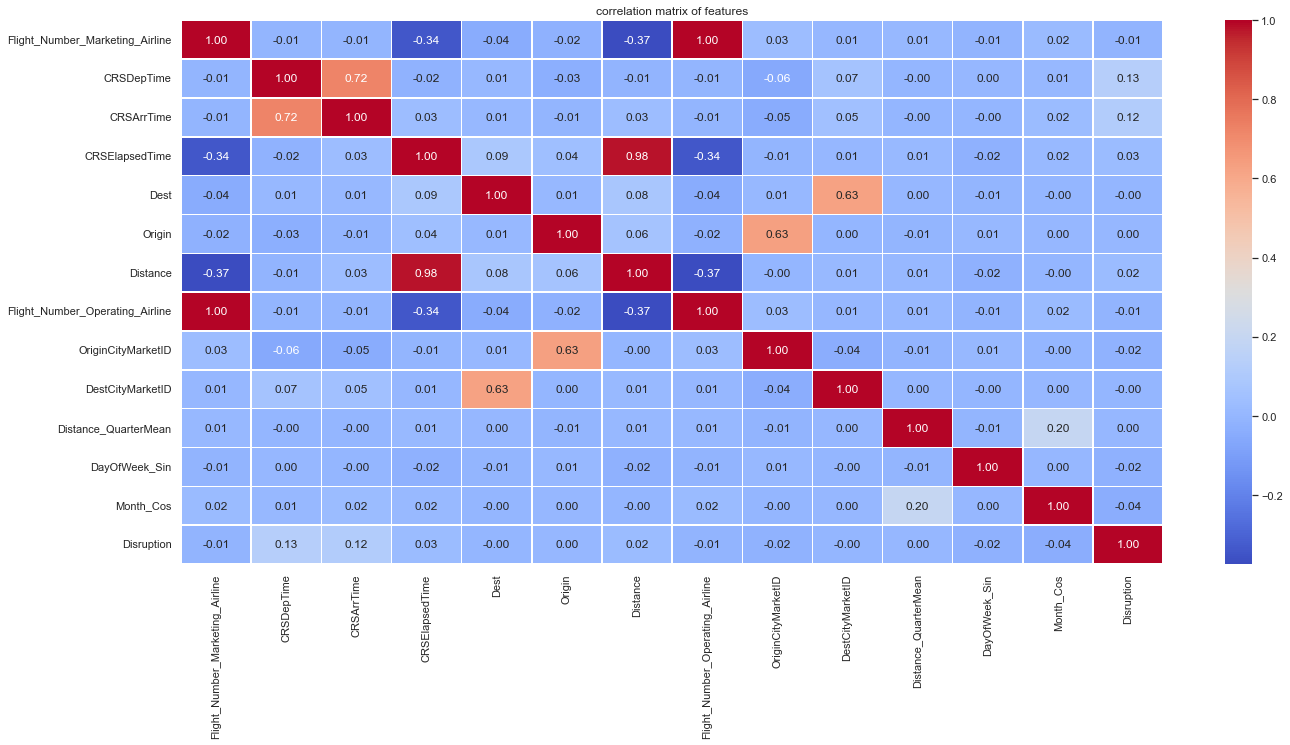

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

def corr(data):
    temp = data.copy()
    plt.figure(figsize=(22,10))
    sns.heatmap(temp.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title("correlation matrix of features")

def select_TopRank_Features(df):
    new_df = pd.DataFrame(data={
        'Flight_Number_Marketing_Airline':df['Flight_Number_Marketing_Airline'],
        'CRSDepTime':df['CRSDepTime'], 
        'CRSArrTime':df['CRSArrTime'],
        'CRSElapsedTime':df['CRSElapsedTime'],
        'Dest':df['Dest'],'Origin':df['Origin'],'Distance':df['Distance'],
        'Flight_Number_Operating_Airline':df['Flight_Number_Operating_Airline'],
        'OriginCityMarketID':df['OriginCityMarketID'],
        'DestCityMarketID': df['DestCityMarketID'],
        'Distance_QuarterMean':df['Distance_QuarterMean'],
        'DayOfWeek_Sin':df['DayOfWeek_Sin'],
        'Month_Cos':df['Month_Cos'],
        'Disruption':df['Disruption']})
    return new_df

new_df = select_TopRank_Features(df)
new_df = Ordinal_Encoder(new_df)
display(new_df)
print(corr(new_df))

## Operations on dataSets

In [49]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import OrdinalEncoder

new_sc = StandardScaler()

"""
    Operate on the training set
    drop 'CRSElapsedTime' variable because it is highly collinear with Distance
"""

new_df.drop('CRSElapsedTime',axis=1, inplace = True)

new_y_train_ = new_df['Disruption'].values
new_x_train_ = new_df.drop('Disruption',axis=1)
new_x_train_ = new_x_train_.values

new_ros = RandomOverSampler(random_state=1)
new_x_train_, new_y_train_ = new_ros.fit_resample(new_x_train_, new_y_train_)
new_idx_ = np.random.choice(np.arange(len(new_x_train_)), 15000, replace=False)
new_x_train = new_x_train_[new_idx_]
new_y_train = new_y_train_[new_idx_]
np.bincount(new_y_train.astype(int))
        
final_x_train = new_sc.fit_transform(new_x_train)
final_y_train = new_y_train
print("The number of balanced training sets is: %s" % np.bincount(final_y_train.astype(int)))

The number of balanced training sets is: [7526 7474]


In [50]:
"""
    Operate on the validation set
"""
temp = val_df.copy()
temp = drop_Columns(temp)
temp = create_NewFeatures(temp)
temp = drop_NARows(temp)
temp = Ordinal_Encoder(temp)

new_val_df = select_TopRank_Features(temp)
new_val_df.drop('CRSElapsedTime',axis=1, inplace = True)

final_y_val = new_val_df['Disruption'].values
final_x_val_ = new_val_df.drop('Disruption',axis=1)
final_x_val = sc.fit_transform(final_x_val_.values)

print("The number of balanced validatin sets is: %s" % np.bincount(final_y_val.astype(int)))

The number of balanced validatin sets is: [4674  998]


In [51]:
"""
    Operate on test set
"""
temp = test_df.copy()
temp = drop_Columns(temp)
temp = create_NewFeatures(temp)
temp = drop_NARows(temp)
temp = Ordinal_Encoder(temp)

new_test_df = select_TopRank_Features(temp)
new_test_df.drop('CRSElapsedTime',axis=1, inplace = True)

final_y_test = new_test_df['Disruption'].values
final_x_test_ = new_test_df.drop('Disruption',axis=1)
final_x_test = sc.fit_transform(final_x_test_.values)

print("The number of balanced test sets is: %s" % np.bincount(final_y_test.astype(int)))

The number of balanced test sets is: [4674  998]


# Model Train

## LightGBM

In [53]:
import optuna
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score
import plotly

def objective_lgbm(trial):
    param = {
        'objective': 'binary',
        'metric': 'auc',
        'verbosity': -1,
        'boosting_type': 'gbdt',
        'n_estimators': trial.suggest_int('n_estimators', 500, 1500),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
        'num_leaves': trial.suggest_int('num_leaves', 32, 512),
        'max_depth': trial.suggest_int('max_depth', -1, 64),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'subsample': trial.suggest_uniform('subsample', 0.2, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.4, 1.0)
    }
    
    model = LGBMClassifier(**param)
    model.fit(final_x_train, final_y_train)
    preds = model.predict(final_x_val)
    # balanced train dataset, choosing accuracy as the optimization target
    auc = accuracy_score(preds,final_y_val)
    return auc

study = optuna.create_study(direction='maximize')
study.optimize(objective_lgbm, n_trials=100)
visua1 = optuna.visualization.plot_optimization_history(study)
plotly.offline.plot(visua1)
print("Best Hyperparameters:", study.best_params)
#medium: {'n_estimators': 1498, 'learning_rate': 0.22738799778606206, 
#'num_leaves': 315, 'max_depth': 50, 'min_child_samples': 9, 
#'subsample': 0.9571666361266281, 'colsample_bytree': 0.5300727312289044}

#{'n_estimators': 1428, 'learning_rate': 0.22092143037205744, '
#num_leaves': 502, 'max_depth': 63, 'min_child_samples': 33, 
#'subsample': 0.9792732635504451, 'colsample_bytree': 0.5764480431373203}

#small: {'n_estimators': 987, 'learning_rate': 0.045220961930139976, 
#'num_leaves': 424, 'max_depth': 26, 'min_child_samples': 5, 
#'subsample': 0.3124708809159456, 'colsample_bytree': 0.5116504951968678}

[I 2024-02-17 09:23:11,607] A new study created in memory with name: no-name-9470103e-b7bd-408b-b7a6-c3cd641d5fba
C:\Users\jp341\AppData\Local\Temp/ipykernel_18476/816443751.py:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

C:\Users\jp341\AppData\Local\Temp/ipykernel_18476/816443751.py:17: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\jp341\AppData\Local\Temp/ipykernel_18476/816443751.py:18: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

[I 2024-02-17 09:23:15,551] Trial 0 finished with value: 0.7020451339915373 and parameters: {'n_esti

[I 2024-02-17 09:23:38,719] Trial 7 finished with value: 0.7318406205923836 and parameters: {'n_estimators': 1142, 'learning_rate': 0.026904774273809464, 'num_leaves': 174, 'max_depth': 25, 'min_child_samples': 37, 'subsample': 0.9863122565000797, 'colsample_bytree': 0.45271641944649865}. Best is trial 7 with value: 0.7318406205923836.
C:\Users\jp341\AppData\Local\Temp/ipykernel_18476/816443751.py:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

C:\Users\jp341\AppData\Local\Temp/ipykernel_18476/816443751.py:17: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\jp341\AppData\Local\Temp/ipykernel_18476/816443751.py:18: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. Th

C:\Users\jp341\AppData\Local\Temp/ipykernel_18476/816443751.py:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

C:\Users\jp341\AppData\Local\Temp/ipykernel_18476/816443751.py:17: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\jp341\AppData\Local\Temp/ipykernel_18476/816443751.py:18: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

[I 2024-02-17 09:24:05,432] Trial 15 finished with value: 0.7753878702397743 and parameters: {'n_estimators': 818, 'learning_rate': 0.09223660416604751, 'num_leaves': 222, 'max_depth': 49, 'min_child_samples': 10, 

[I 2024-02-17 09:24:28,232] Trial 22 finished with value: 0.7605782792665726 and parameters: {'n_estimators': 723, 'learning_rate': 0.1617703641950986, 'num_leaves': 202, 'max_depth': 54, 'min_child_samples': 12, 'subsample': 0.26618389466083253, 'colsample_bytree': 0.5853175459925333}. Best is trial 15 with value: 0.7753878702397743.
C:\Users\jp341\AppData\Local\Temp/ipykernel_18476/816443751.py:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

C:\Users\jp341\AppData\Local\Temp/ipykernel_18476/816443751.py:17: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\jp341\AppData\Local\Temp/ipykernel_18476/816443751.py:18: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. Thi

C:\Users\jp341\AppData\Local\Temp/ipykernel_18476/816443751.py:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

C:\Users\jp341\AppData\Local\Temp/ipykernel_18476/816443751.py:17: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\jp341\AppData\Local\Temp/ipykernel_18476/816443751.py:18: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

[I 2024-02-17 09:24:58,960] Trial 30 finished with value: 0.7480606488011283 and parameters: {'n_estimators': 655, 'learning_rate': 0.029042249306163476, 'num_leaves': 196, 'max_depth': 36, 'min_child_samples': 18,

[I 2024-02-17 09:25:41,142] Trial 37 finished with value: 0.7651622002820875 and parameters: {'n_estimators': 925, 'learning_rate': 0.08316910923129968, 'num_leaves': 475, 'max_depth': 36, 'min_child_samples': 11, 'subsample': 0.4345091968208852, 'colsample_bytree': 0.6081526797211996}. Best is trial 24 with value: 0.7805007052186178.
C:\Users\jp341\AppData\Local\Temp/ipykernel_18476/816443751.py:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

C:\Users\jp341\AppData\Local\Temp/ipykernel_18476/816443751.py:17: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\jp341\AppData\Local\Temp/ipykernel_18476/816443751.py:18: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. Thi

C:\Users\jp341\AppData\Local\Temp/ipykernel_18476/816443751.py:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

C:\Users\jp341\AppData\Local\Temp/ipykernel_18476/816443751.py:17: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\jp341\AppData\Local\Temp/ipykernel_18476/816443751.py:18: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

[I 2024-02-17 09:26:18,060] Trial 45 finished with value: 0.7722143864598026 and parameters: {'n_estimators': 657, 'learning_rate': 0.06209246840894993, 'num_leaves': 372, 'max_depth': 30, 'min_child_samples': 11, 

[I 2024-02-17 09:26:48,496] Trial 52 finished with value: 0.7678067700987306 and parameters: {'n_estimators': 1084, 'learning_rate': 0.01785460451826716, 'num_leaves': 268, 'max_depth': 24, 'min_child_samples': 5, 'subsample': 0.8451330285295946, 'colsample_bytree': 0.4280790794004911}. Best is trial 47 with value: 0.7852609308885754.
C:\Users\jp341\AppData\Local\Temp/ipykernel_18476/816443751.py:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

C:\Users\jp341\AppData\Local\Temp/ipykernel_18476/816443751.py:17: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\jp341\AppData\Local\Temp/ipykernel_18476/816443751.py:18: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. Thi

C:\Users\jp341\AppData\Local\Temp/ipykernel_18476/816443751.py:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

C:\Users\jp341\AppData\Local\Temp/ipykernel_18476/816443751.py:17: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\jp341\AppData\Local\Temp/ipykernel_18476/816443751.py:18: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

[I 2024-02-17 09:27:27,668] Trial 60 finished with value: 0.7482369534555712 and parameters: {'n_estimators': 759, 'learning_rate': 0.018506456773957163, 'num_leaves': 354, 'max_depth': 30, 'min_child_samples': 21,

[I 2024-02-17 09:27:51,665] Trial 67 finished with value: 0.768688293370945 and parameters: {'n_estimators': 1002, 'learning_rate': 0.040362102723068366, 'num_leaves': 277, 'max_depth': 24, 'min_child_samples': 14, 'subsample': 0.4649660292891649, 'colsample_bytree': 0.4898937134607827}. Best is trial 47 with value: 0.7852609308885754.
C:\Users\jp341\AppData\Local\Temp/ipykernel_18476/816443751.py:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

C:\Users\jp341\AppData\Local\Temp/ipykernel_18476/816443751.py:17: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\jp341\AppData\Local\Temp/ipykernel_18476/816443751.py:18: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. Th

C:\Users\jp341\AppData\Local\Temp/ipykernel_18476/816443751.py:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

C:\Users\jp341\AppData\Local\Temp/ipykernel_18476/816443751.py:17: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\jp341\AppData\Local\Temp/ipykernel_18476/816443751.py:18: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

[I 2024-02-17 09:28:32,753] Trial 75 finished with value: 0.7856135401974612 and parameters: {'n_estimators': 824, 'learning_rate': 0.0483750508242951, 'num_leaves': 422, 'max_depth': 48, 'min_child_samples': 5, 's

[I 2024-02-17 09:29:24,776] Trial 82 finished with value: 0.7806770098730607 and parameters: {'n_estimators': 971, 'learning_rate': 0.06400561079775191, 'num_leaves': 455, 'max_depth': 28, 'min_child_samples': 5, 'subsample': 0.27832118671220213, 'colsample_bytree': 0.48497065689250035}. Best is trial 77 with value: 0.7910789844851904.
C:\Users\jp341\AppData\Local\Temp/ipykernel_18476/816443751.py:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

C:\Users\jp341\AppData\Local\Temp/ipykernel_18476/816443751.py:17: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\jp341\AppData\Local\Temp/ipykernel_18476/816443751.py:18: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. Th

C:\Users\jp341\AppData\Local\Temp/ipykernel_18476/816443751.py:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

C:\Users\jp341\AppData\Local\Temp/ipykernel_18476/816443751.py:17: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\jp341\AppData\Local\Temp/ipykernel_18476/816443751.py:18: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

[I 2024-02-17 09:30:07,993] Trial 90 finished with value: 0.7782087447108603 and parameters: {'n_estimators': 694, 'learning_rate': 0.08811644667726581, 'num_leaves': 512, 'max_depth': 19, 'min_child_samples': 7, '

[I 2024-02-17 09:30:37,342] Trial 97 finished with value: 0.7447108603667136 and parameters: {'n_estimators': 680, 'learning_rate': 0.10588628945703096, 'num_leaves': 420, 'max_depth': 13, 'min_child_samples': 20, 'subsample': 0.23710696849355462, 'colsample_bytree': 0.4596999370538028}. Best is trial 77 with value: 0.7910789844851904.
C:\Users\jp341\AppData\Local\Temp/ipykernel_18476/816443751.py:13: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

C:\Users\jp341\AppData\Local\Temp/ipykernel_18476/816443751.py:17: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\jp341\AppData\Local\Temp/ipykernel_18476/816443751.py:18: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. Th

Best Hyperparameters: {'n_estimators': 987, 'learning_rate': 0.045220961930139976, 'num_leaves': 424, 'max_depth': 26, 'min_child_samples': 5, 'subsample': 0.3124708809159456, 'colsample_bytree': 0.5116504951968678}


## Decision Tree

In [54]:
import optuna
import plotly
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

def objective_decisionTree(trial):
    param = {
        'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy']),
        'splitter': trial.suggest_categorical('splitter', ['best', 'random']),
        'max_depth': trial.suggest_int('max_depth', 1, 32),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 100),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 50),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
        'random_state':24
    }
    
    model = DecisionTreeClassifier(**param)
    model.fit(final_x_train, final_y_train)
    preds = model.predict(final_x_val)
    accuracy = accuracy_score(final_y_val, preds)
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective_decisionTree, n_trials=100)
visua1 = optuna.visualization.plot_optimization_history(study)
plotly.offline.plot(visua1)
print("Best Hyperparameters:", study.best_params)
#medium: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 1, 
#'min_samples_split': 71, 'min_samples_leaf': 31, 'max_features': 'sqrt'}

#large: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 1,
#'min_samples_split': 23, 'min_samples_leaf': 33, 'max_features': None}

#small: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 31, 
#'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2'}

[I 2024-02-17 09:31:40,355] A new study created in memory with name: no-name-db4a76be-02d3-42a0-8684-d7081e9335bd
[I 2024-02-17 09:31:40,389] Trial 0 finished with value: 0.597672778561354 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 25, 'min_samples_split': 60, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.597672778561354.
[I 2024-02-17 09:31:40,407] Trial 1 finished with value: 0.4855430183356841 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 5, 'min_samples_split': 24, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 0 with value: 0.597672778561354.
[I 2024-02-17 09:31:40,439] Trial 2 finished with value: 0.5708744710860366 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 31, 'min_samples_split': 29, 'min_samples_leaf': 50, 'max_features': 'log2'}. Best is trial 0 with value: 0.597672778561354.
[I 2024-02-17 09:31:40,459] Trial 3 finished with value: 0.53102961

[I 2024-02-17 09:31:42,916] Trial 30 finished with value: 0.6225317348377997 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 24, 'min_samples_split': 31, 'min_samples_leaf': 4, 'max_features': None}. Best is trial 24 with value: 0.6304654442877292.
[I 2024-02-17 09:31:43,099] Trial 31 finished with value: 0.6172425952045134 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 24, 'min_samples_split': 31, 'min_samples_leaf': 5, 'max_features': None}. Best is trial 24 with value: 0.6304654442877292.
[I 2024-02-17 09:31:43,291] Trial 32 finished with value: 0.6232369534555712 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 30, 'min_samples_split': 24, 'min_samples_leaf': 6, 'max_features': None}. Best is trial 24 with value: 0.6304654442877292.
[I 2024-02-17 09:31:43,457] Trial 33 finished with value: 0.610719322990127 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 30, 'min_samples_split': 

[I 2024-02-17 09:31:45,371] Trial 60 finished with value: 0.5798660084626234 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 32, 'min_samples_split': 7, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 51 with value: 0.6667842031029619.
[I 2024-02-17 09:31:45,450] Trial 61 finished with value: 0.6553244005641748 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 32, 'min_samples_split': 11, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 51 with value: 0.6667842031029619.
[I 2024-02-17 09:31:45,518] Trial 62 finished with value: 0.6057827926657263 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 30, 'min_samples_split': 56, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 51 with value: 0.6667842031029619.
[I 2024-02-17 09:31:45,594] Trial 63 finished with value: 0.6491537376586742 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 31, 'min_samples_

[I 2024-02-17 09:31:47,469] Trial 90 finished with value: 0.5728138222849083 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 32, 'min_samples_split': 20, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 51 with value: 0.6667842031029619.
[I 2024-02-17 09:31:47,540] Trial 91 finished with value: 0.6690761636107193 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 31, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 91 with value: 0.6690761636107193.
[I 2024-02-17 09:31:47,621] Trial 92 finished with value: 0.6614950634696756 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 30, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 91 with value: 0.6690761636107193.
[I 2024-02-17 09:31:47,706] Trial 93 finished with value: 0.6357545839210155 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 29, 'min_samples_spli

Best Hyperparameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 31, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2'}


# Model evaluation

In [55]:
import optuna
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score
import plotly
from sklearn.tree import DecisionTreeClassifier

model_LGBM = LGBMClassifier(**{'n_estimators': 987, 'learning_rate': 0.045220961930139976, 
                               'num_leaves': 424, 'max_depth': 26, 'min_child_samples': 5, 
                               'subsample': 0.3124708809159456, 
                               'colsample_bytree': 0.5116504951968678})
model_DT = DecisionTreeClassifier(**{'criterion': 'entropy', 'splitter': 'best', 
                                     'max_depth': 31, 'min_samples_split': 2, 
                                     'min_samples_leaf': 2, 'max_features': 'log2'})
model_LGBM.fit(final_x_train, final_y_train)
model_DT.fit(final_x_train, final_y_train)

print('LightGBM results are:')
y_preds = model_LGBM.predict(final_x_test)
print('accuracy socre: %.3f' % accuracy_score(y_preds,final_y_test))
print('f1_score: %.3f' % f1_score(final_y_test, y_preds, average='macro'))
print('recall: %.3f' % recall_score(final_y_test, y_preds,average='macro'))
print('precision: %.3f' % precision_score(final_y_test, y_preds,average='macro'))
auc_score = roc_auc_score(final_y_test, y_preds)
print("AUC Score:", auc_score)

print('Decision Tree results are:')
y_preds = model_DT.predict(final_x_test)
print('accuracy socre: %.3f' % accuracy_score(y_preds,final_y_test))
print('f1_score: %.3f' % f1_score(final_y_test, y_preds, average='macro'))
print('recall: %.3f' % recall_score(final_y_test, y_preds,average='macro'))
print('precision: %.3f' % precision_score(final_y_test, y_preds,average='macro'))
auc_score = roc_auc_score(final_y_test, y_preds)
print("AUC Score:", auc_score)

[LightGBM] [Info] Number of positive: 7474, number of negative: 7526
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000653 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2163
[LightGBM] [Info] Number of data points in the train set: 15000, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498267 -> initscore=-0.006933
[LightGBM] [Info] Start training from score -0.006933
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

## Brief results conclusion

*1. result of small dataSet*

**(a) LightGBM(best model) results are:**

accuracy socre: 0.786

f1_score: 0.511

recall: 0.517

precision: 0.537

AUC Score: 0.5172981821580689

**(b) Decision Tree results are:**

accuracy socre: 0.649

f1_score: 0.498

recall: 0.506

precision: 0.504

AUC Score: 0.5057847830877845

-------------------------------

*2. result of medium dataSet*

**(a) LightGBM(best model) results are:**

accuracy socre: 0.765

f1_score: 0.536

recall: 0.534

precision: 0.548

AUC Score: 0.5343826003225448

**(b) Decision Tree results are:**

accuracy socre: 0.670

f1_score: 0.516

recall: 0.524

precision: 0.518

AUC Score: 0.5238336378522797

-------------------------------

*3. result of large dataSet*

**(a) LightGBM(best model) results are:**

accuracy socre: 0.691

f1_score: 0.552

recall: 0.560

precision: 0.550

AUC Score: 0.5601229441079516

**(b) Decision Tree results are:**

accuracy socre: 0.663

f1_score: 0.516

recall: 0.521

precision: 0.517

AUC Score: 0.5208178160132528